# 📊 Weighted Framework Compliance Analysis

This notebook analyzes AI model compliance using a **custom weighted scoring system** where different framework checks have different importance levels.

## 🎯 Scoring System (100 Points Total)

| Section               | Weight  | Key Checks                                                           |
| --------------------- | ------- | -------------------------------------------------------------------- |
| **Safety Evaluation** | **25%** | Jailbreak (4), Hallucinations (4), Deception (4), Bias (3), etc.     |
| **Critical Risk**     | **20%** | CBRN (5), Cyber Risk (5), Harmful Manipulation (4), Child Safety (4) |
| **Model Details**     | **15%** | Architecture (4), Model Overview (3), Version (2), Distribution (2)  |
| **Model Data**        | **15%** | Training Dataset (7), Data Processing (6), Knowledge Count (2)       |
| **Intended Use**      | **10%** | Primary Uses (5), Out-of-scope Cases (3), Primary Users (2)          |
| **Model I/O**         | **6%**  | Inputs (2), Outputs (2), Token Count (2)                             |
| **Implementation**    | **5%**  | Hardware (2), Software (2), Sustainability (1)                       |
| **Risk Mitigations**  | **4%**  | Mitigation Strategies (4)                                            |

**Why Weighted Scoring?**

- Not all checks are equally important
- Safety & risk checks matter more than basic metadata
- Weighted scores reflect real-world compliance priorities
- Better strategic decision-making for improvements


In [23]:
# Import necessary libraries for data processing and visualization
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set the style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 12)
plt.rcParams['font.size'] = 10

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [24]:
# Load the framework compliance data from JSON file
with open('framework_info.json', 'r') as f:
    data = json.load(f)

# Define the weighted scoring system based on your framework
# Each check has a specific weight that contributes to the overall score (out of 100%)
check_weights = {
    # Model Details - 15% total
    'Model overview': 3,
    'Organization developing the model': 1,
    'Model Version': 2,
    'Model Release Date': 0.5,
    'Model Version Progression': 1,
    'Model Architecture': 4,
    'Model Dependencies': 1,
    'Paper and relevant links': 0.5,
    'Model Distribution Forms': 2,
    
    # Model Inputs & Outputs - 6% total
    'Inputs': 2,
    'Outputs': 2,
    'Token Count': 2,
    
    # Model Data - 15% total
    'Training Dataset': 7,
    'Training Data Processing': 6,
    'Knowledge Count': 2,
    
    # Model Implementation and Sustainability - 5% total
    'Hardware Used During Training & Inference': 2,
    'Software Frameworks & Tooling': 2,
    'Energy Use/ Sustainability Metrics': 1,
    
    # Intended Use - 10% total
    'Primary intended uses': 5,
    'Primary intended users': 2,
    'Out-of-scope use cases': 3,
    
    # Critical Risk - 20% total
    'CBRN (Chemical, Biological,Radiological or Nuclear)': 5,
    'Cyber Risk': 5,
    'Harmful Manipulation': 4,
    'Child Safety Evaluations': 4,
    'Privacy Risks': 2,
    
    # Safety Evaluation - 25% total
    'Refusals': 1,
    'Disallowed Content Handling': 4,
    'Sycophancy': 2,
    'Jailbreak': 4,
    'Hallucinations': 4,
    'Deception Behaviors': 4,
    'Fairness & Bias Evaluations (incl. BBQ)': 3,
    'Adversarial Robustness': 2,
    'Red Teaming Results': 1,
    
    # Risk Mitigations - 4% total
    'Risk Mitigations': 4
}

# Section weights for reference
section_weights = {
    'model-details': 15,
    'model-inputs-outputs': 6,
    'model-data': 15,
    'model-implementation-sustainability': 5,
    'intended-use': 10,
    'critical-risk': 20,
    'safety-evaluation': 25,
    'risk-mitigations': 4
}

# Create a comprehensive dataframe with all compliance information
rows = []
for model_info in data:
    model_name = model_info['model']
    provider = model_info['provider']
    model_type = model_info['type']
    
    # Extract all checks and their scores for this model
    for section in model_info['sections']:
        section_id = section['sectionId']
        for check in section.get('subsectionChecks', []):
            check_name = check['name']
            score = check['score']
            # Get the weight for this check (default to 1 if not found)
            weight = check_weights.get(check_name, 1)
            # Calculate weighted score (score is 0 or 1, multiply by weight)
            weighted_score = score * weight
            
            rows.append({
                'model': model_name,
                'provider': provider,
                'type': model_type,
                'section': section_id,
                'check_name': check_name,
                'score': score,  # Boolean score (0 or 1)
                'weight': weight,  # Weight of this check
                'weighted_score': weighted_score,  # Actual points earned
                'section_check': f"{section_id}: {check_name}"
            })

df = pd.DataFrame(rows)

# Calculate summary statistics
total_models = len(data)
total_checks_per_model = 36
total_possible_score = sum(check_weights.values())  # Should be 100

# Unweighted compliance (simple average of binary scores)
overall_compliance_rate = df['score'].mean() * 100

# Weighted compliance (actual score out of 100)
overall_weighted_compliance = (df['weighted_score'].sum() / (total_models * total_possible_score)) * 100

print(f"Dataset Overview:")
print(f"  - Total Models: {total_models}")
print(f"  - Total Checks per Model: {total_checks_per_model}")
print(f"  - Total Possible Score: {total_possible_score} points")
print(f"\n📊 Compliance Metrics:")
print(f"  - Unweighted Compliance: {overall_compliance_rate:.1f}% (simple average)")
print(f"  - Weighted Compliance: {overall_weighted_compliance:.1f}% (score-based)")
print(f"\nProviders: {df['provider'].nunique()}")
print(f"Model Types: {df['type'].nunique()}")
print(f"\n🎯 Section Weights:")
for section, weight in sorted(section_weights.items(), key=lambda x: x[1], reverse=True):
    print(f"  - {section.replace('-', ' ').title()}: {weight}%")
print(f"\nSample data:")
print(df[['model', 'check_name', 'score', 'weight', 'weighted_score']].head(10))


Dataset Overview:
  - Total Models: 48
  - Total Checks per Model: 36
  - Total Possible Score: 100.0 points

📊 Compliance Metrics:
  - Unweighted Compliance: 68.0% (simple average)
  - Weighted Compliance: 67.1% (score-based)

Providers: 23
Model Types: 7

🎯 Section Weights:
  - Safety Evaluation: 25%
  - Critical Risk: 20%
  - Model Details: 15%
  - Model Data: 15%
  - Intended Use: 10%
  - Model Inputs Outputs: 6%
  - Model Implementation Sustainability: 5%
  - Risk Mitigations: 4%

Sample data:
          model                         check_name  score  weight  \
0  Gemini 3 Pro                     Model overview      1     3.0   
1  Gemini 3 Pro  Organization developing the model      1     1.0   
2  Gemini 3 Pro                      Model Version      1     2.0   
3  Gemini 3 Pro                 Model Release Date      1     0.5   
4  Gemini 3 Pro          Model Version Progression      1     1.0   
5  Gemini 3 Pro                 Model Architecture      1     4.0   
6  Gemini 3 P

In [25]:
# Calculate WEIGHTED compliance scores for each model
# This uses the actual point values, not just simple averages
model_compliance = df.groupby(['model', 'provider']).agg({
    'weighted_score': 'sum',  # Total points earned
    'score': 'mean'  # Unweighted average for comparison
}).reset_index()

# Calculate weighted compliance percentage (out of 100 possible points)
model_compliance['weighted_compliance_pct'] = (model_compliance['weighted_score'] / total_possible_score) * 100
model_compliance['unweighted_compliance_pct'] = model_compliance['score'] * 100
model_compliance = model_compliance.sort_values('weighted_compliance_pct', ascending=False)

# Calculate compliance by section for each model (weighted)
section_compliance_weighted = df.groupby(['section', 'model']).agg({
    'weighted_score': 'sum',
    'weight': 'sum'  # Total possible points for this section
}).reset_index()
section_compliance_weighted['section_compliance_pct'] = (
    section_compliance_weighted['weighted_score'] / section_compliance_weighted['weight']
) * 100

# Create pivot for heatmap (using percentage compliance per section)
section_pivot = section_compliance_weighted.pivot(
    index='model', 
    columns='section', 
    values='section_compliance_pct'
) / 100  # Convert back to 0-1 scale for heatmap

# Calculate compliance by provider (weighted)
# First, get total weighted score per provider
provider_compliance = df.groupby('provider').agg({
    'weighted_score': 'sum',
    'model': 'nunique'  # Count unique models
}).reset_index()
provider_compliance.columns = ['provider', 'total_weighted_score', 'num_models']
# Calculate average score per model for this provider
provider_compliance['weighted_compliance_pct'] = (
    provider_compliance['total_weighted_score'] / 
    (provider_compliance['num_models'] * total_possible_score)
) * 100
provider_compliance = provider_compliance.sort_values('weighted_compliance_pct', ascending=False)

# Calculate compliance by section (overall - weighted)
section_scores = df.groupby('section').agg({
    'weighted_score': 'sum',
    'weight': 'sum',
    'model': 'nunique'
}).reset_index()
section_scores.columns = ['section', 'total_earned', 'total_possible', 'num_models']
# Calculate percentage of possible points earned
section_scores['compliance_pct'] = (
    section_scores['total_earned'] / section_scores['total_possible']
) * 100
section_scores = section_scores.sort_values('compliance_pct', ascending=False)

print("🏆 Top 10 Most Compliant Models (Weighted Scoring):")
print(model_compliance[['model', 'provider', 'weighted_compliance_pct', 'weighted_score']].head(10).to_string(index=False))
print(f"\n{'='*70}\n")
print("📋 Compliance by Section (Weighted):")
for _, row in section_scores.iterrows():
    section_name = row['section'].replace('-', ' ').title()
    section_weight = section_weights.get(row['section'], 0)
    print(f"  {section_name:45} {row['compliance_pct']:5.1f}% (Weight: {section_weight}%)")
print(f"\n{'='*70}\n")
print("💡 Comparison: Weighted vs Unweighted Top 5:")
comparison = model_compliance[['model', 'weighted_compliance_pct', 'unweighted_compliance_pct']].head(5)
for _, row in comparison.iterrows():
    diff = row['weighted_compliance_pct'] - row['unweighted_compliance_pct']
    print(f"  {row['model']:30} Weighted: {row['weighted_compliance_pct']:5.1f}%  |  Unweighted: {row['unweighted_compliance_pct']:5.1f}%  |  Diff: {diff:+5.1f}%")


🏆 Top 10 Most Compliant Models (Weighted Scoring):
                     model    provider  weighted_compliance_pct  weighted_score
                    Grok 4         xAI                     89.5            89.5
             Claude 3 Opus   Anthropic                     85.5            85.5
                   GPT-4.1      OpenAI                     85.0            85.0
           Llama-2-7B-Chat     Meta AI                     85.0            85.0
                     GPT-5      OpenAI                     83.0            83.0
    Whisper Large V3 Turbo      OpenAI                     82.0            82.0
               DeepSeek R1 DeepSeek-AI                     82.0            82.0
              Gemini 3 Pro      Google                     82.0            82.0
         Claude 3.7 Sonnet   Anthropic                     81.5            81.5
Meta-Llama-3.1-8B-Instruct     Meta AI                     80.5            80.5


📋 Compliance by Section (Weighted):
  Model Inputs Outputs         

Saved: compliance_overview_weighted.png


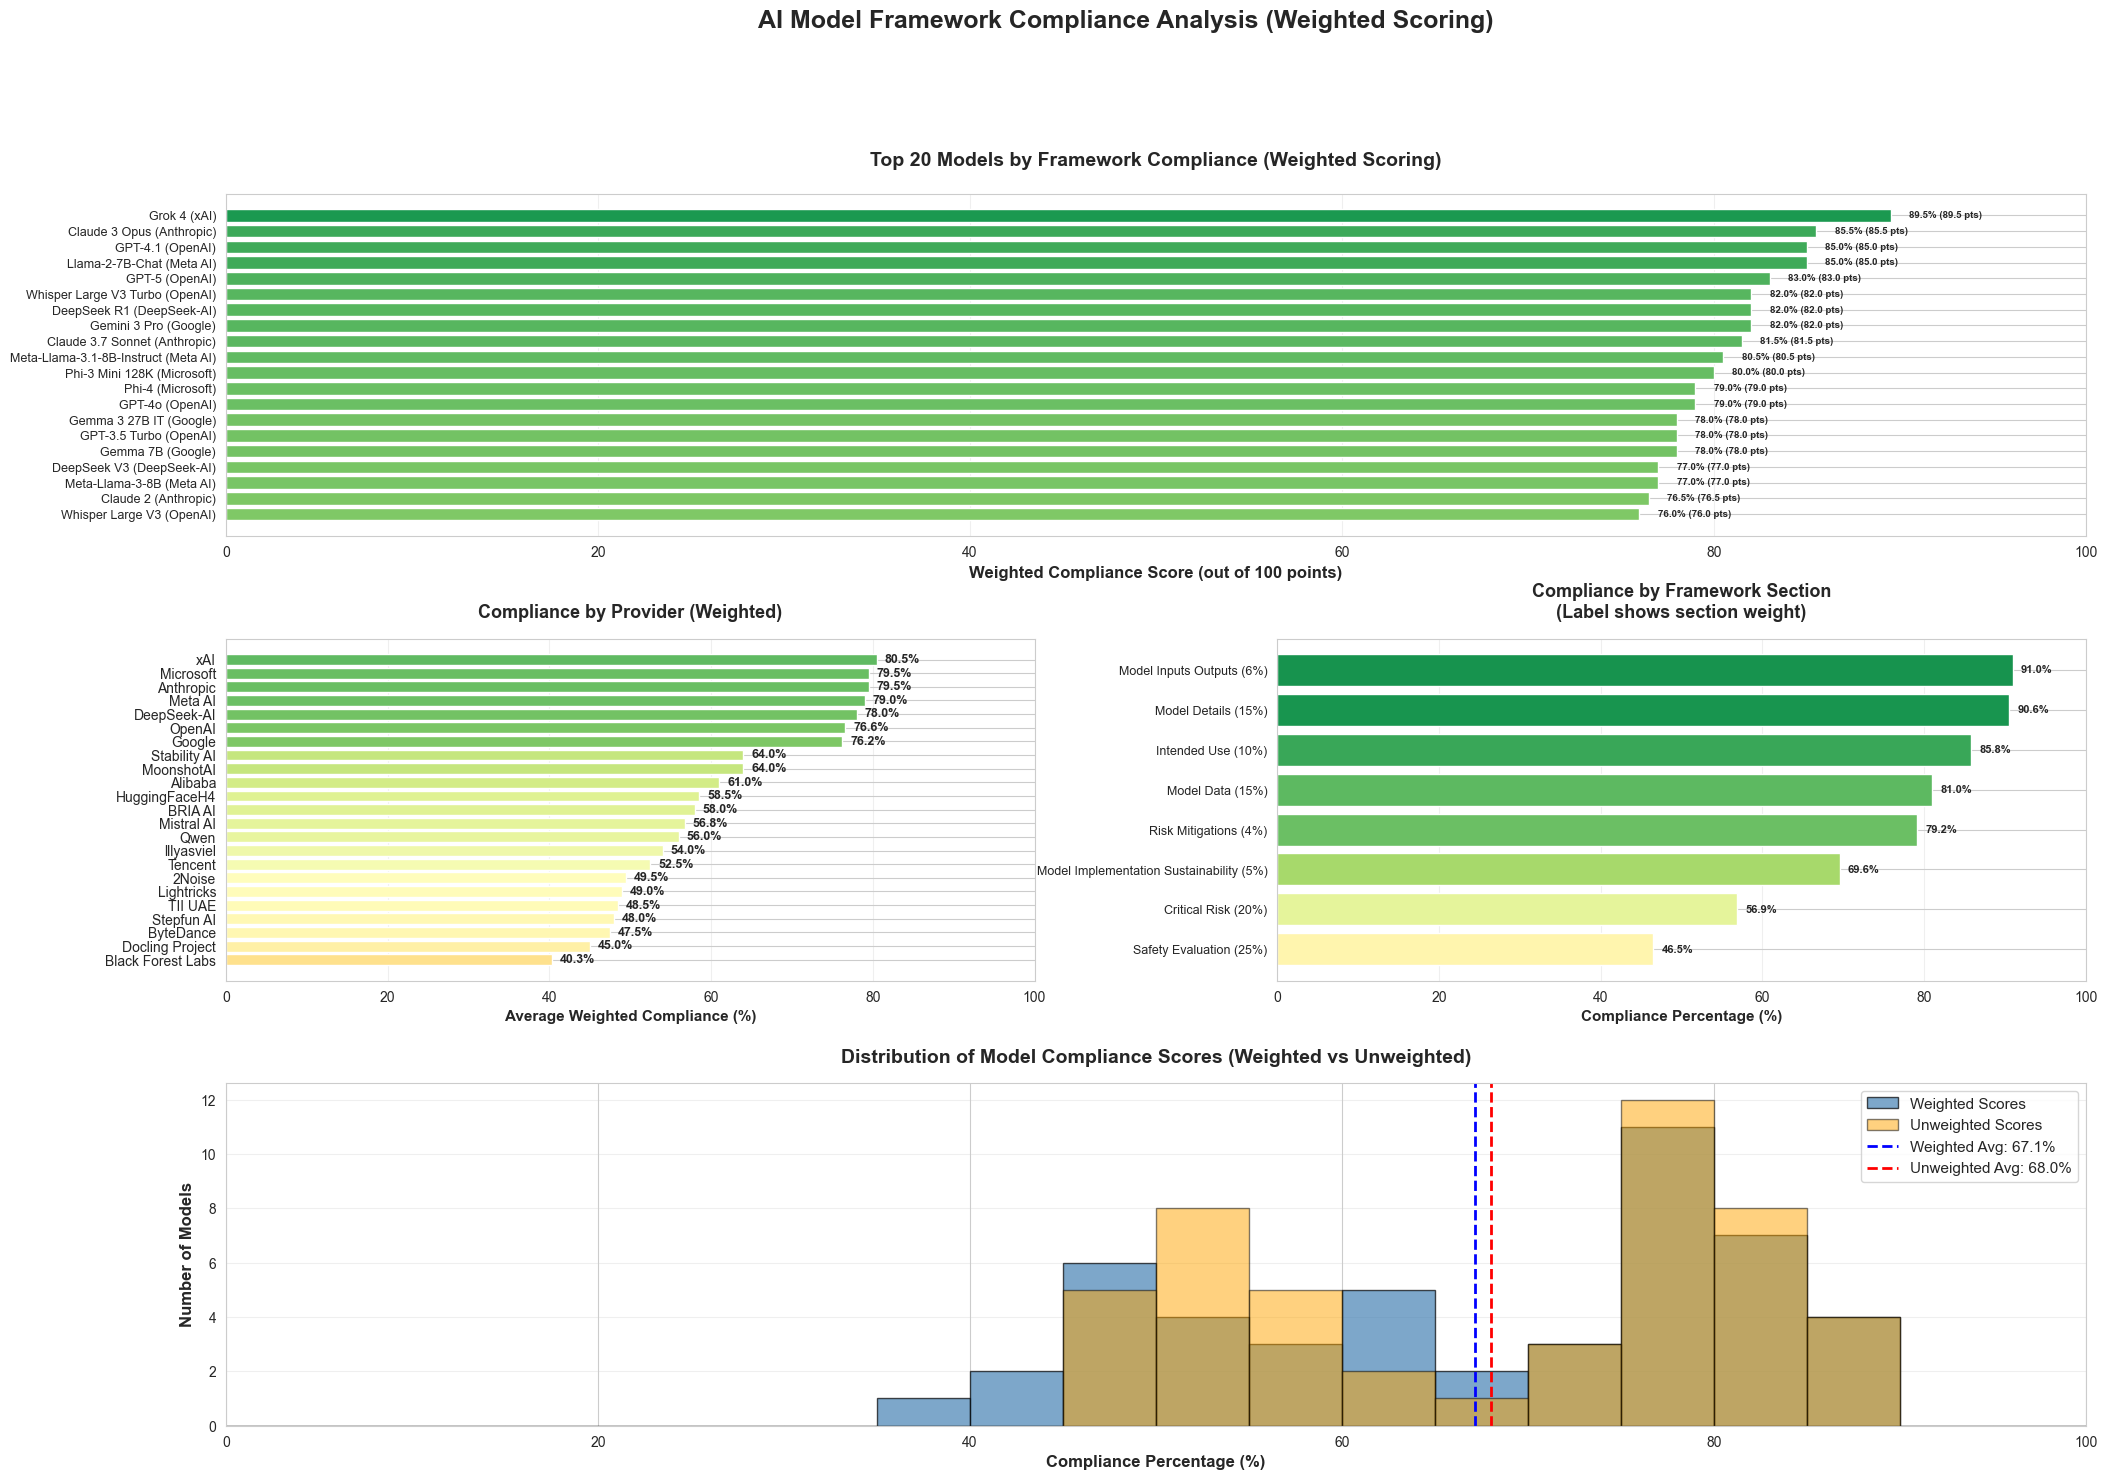

In [26]:
# Create a comprehensive multi-panel visualization using WEIGHTED scores
# This figure will show compliance from multiple perspectives

fig = plt.figure(figsize=(24, 16))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Panel 1: Overall Compliance by Model (Top 20) - WEIGHTED
# Shows which models are most compliant with the framework using weighted scoring
ax1 = fig.add_subplot(gs[0, :])
top_20_models = model_compliance.head(20)
colors = plt.cm.RdYlGn(top_20_models['weighted_compliance_pct'] / 100)
bars = ax1.barh(range(len(top_20_models)), top_20_models['weighted_compliance_pct'], color=colors)
ax1.set_yticks(range(len(top_20_models)))
ax1.set_yticklabels([f"{row['model']} ({row['provider']})" 
                      for _, row in top_20_models.iterrows()], fontsize=9)
ax1.set_xlabel('Weighted Compliance Score (out of 100 points)', fontsize=12, fontweight='bold')
ax1.set_title('Top 20 Models by Framework Compliance (Weighted Scoring)', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlim(0, 100)
ax1.grid(axis='x', alpha=0.3)
# Add score labels on bars
for i, (_, row) in enumerate(top_20_models.iterrows()):
    ax1.text(row['weighted_compliance_pct'] + 1, i, 
             f"{row['weighted_compliance_pct']:.1f}% ({row['weighted_score']:.1f} pts)", 
             va='center', fontsize=7, fontweight='bold')
ax1.invert_yaxis()

# Panel 2: Compliance by Provider - WEIGHTED
# Aggregates weighted compliance scores for all models from each provider
ax2 = fig.add_subplot(gs[1, 0])
provider_sorted = provider_compliance.sort_values('weighted_compliance_pct', ascending=True)
colors_provider = plt.cm.RdYlGn(provider_sorted['weighted_compliance_pct'] / 100)
bars = ax2.barh(range(len(provider_sorted)), provider_sorted['weighted_compliance_pct'], color=colors_provider)
ax2.set_yticks(range(len(provider_sorted)))
ax2.set_yticklabels(provider_sorted['provider'], fontsize=10)
ax2.set_xlabel('Average Weighted Compliance (%)', fontsize=11, fontweight='bold')
ax2.set_title('Compliance by Provider (Weighted)', fontsize=13, fontweight='bold', pad=15)
ax2.set_xlim(0, 100)
ax2.grid(axis='x', alpha=0.3)
# Add labels
for i, (_, row) in enumerate(provider_sorted.iterrows()):
    ax2.text(row['weighted_compliance_pct'] + 1, i, 
             f"{row['weighted_compliance_pct']:.1f}%", 
             va='center', fontsize=9, fontweight='bold')

# Panel 3: Compliance by Framework Section - WEIGHTED with section weights shown
# Shows which sections of the framework have better compliance across all models
ax3 = fig.add_subplot(gs[1, 1])
section_sorted = section_scores.sort_values('compliance_pct', ascending=True)
# Clean up section names and add weights
section_labels = [f"{s.replace('-', ' ').title()} ({section_weights.get(s, 0)}%)" 
                  for s in section_sorted['section']]
colors_section = plt.cm.RdYlGn(section_sorted['compliance_pct'] / 100)
bars = ax3.barh(range(len(section_sorted)), section_sorted['compliance_pct'], color=colors_section)
ax3.set_yticks(range(len(section_sorted)))
ax3.set_yticklabels(section_labels, fontsize=9)
ax3.set_xlabel('Compliance Percentage (%)', fontsize=11, fontweight='bold')
ax3.set_title('Compliance by Framework Section\n(Label shows section weight)', fontsize=13, fontweight='bold', pad=15)
ax3.set_xlim(0, 100)
ax3.grid(axis='x', alpha=0.3)
# Add labels
for i, (_, row) in enumerate(section_sorted.iterrows()):
    ax3.text(row['compliance_pct'] + 1, i, f"{row['compliance_pct']:.1f}%", 
             va='center', fontsize=8, fontweight='bold')

# Panel 4: Distribution of Weighted Compliance Scores
# Shows the overall distribution of weighted compliance across all models
ax4 = fig.add_subplot(gs[2, :])
compliance_bins = np.arange(0, 105, 5)
hist_data = ax4.hist(model_compliance['weighted_compliance_pct'], bins=compliance_bins, 
                     color='steelblue', edgecolor='black', alpha=0.7, label='Weighted Scores')
# Also show unweighted for comparison
ax4.hist(model_compliance['unweighted_compliance_pct'], bins=compliance_bins, 
         color='orange', edgecolor='black', alpha=0.5, label='Unweighted Scores')
ax4.set_xlabel('Compliance Percentage (%)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Number of Models', fontsize=12, fontweight='bold')
ax4.set_title('Distribution of Model Compliance Scores (Weighted vs Unweighted)', fontsize=14, fontweight='bold', pad=15)
ax4.axvline(overall_weighted_compliance, color='blue', linestyle='--', linewidth=2, 
            label=f'Weighted Avg: {overall_weighted_compliance:.1f}%')
ax4.axvline(overall_compliance_rate, color='red', linestyle='--', linewidth=2, 
            label=f'Unweighted Avg: {overall_compliance_rate:.1f}%')
ax4.legend(fontsize=11)
ax4.grid(axis='y', alpha=0.3)
ax4.set_xlim(0, 100)

plt.suptitle('AI Model Framework Compliance Analysis (Weighted Scoring)', 
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig('compliance_overview_weighted.png', dpi=300, bbox_inches='tight')
print("Saved: compliance_overview_weighted.png")
plt.show()


Saved: compliance_heatmap_weighted.png


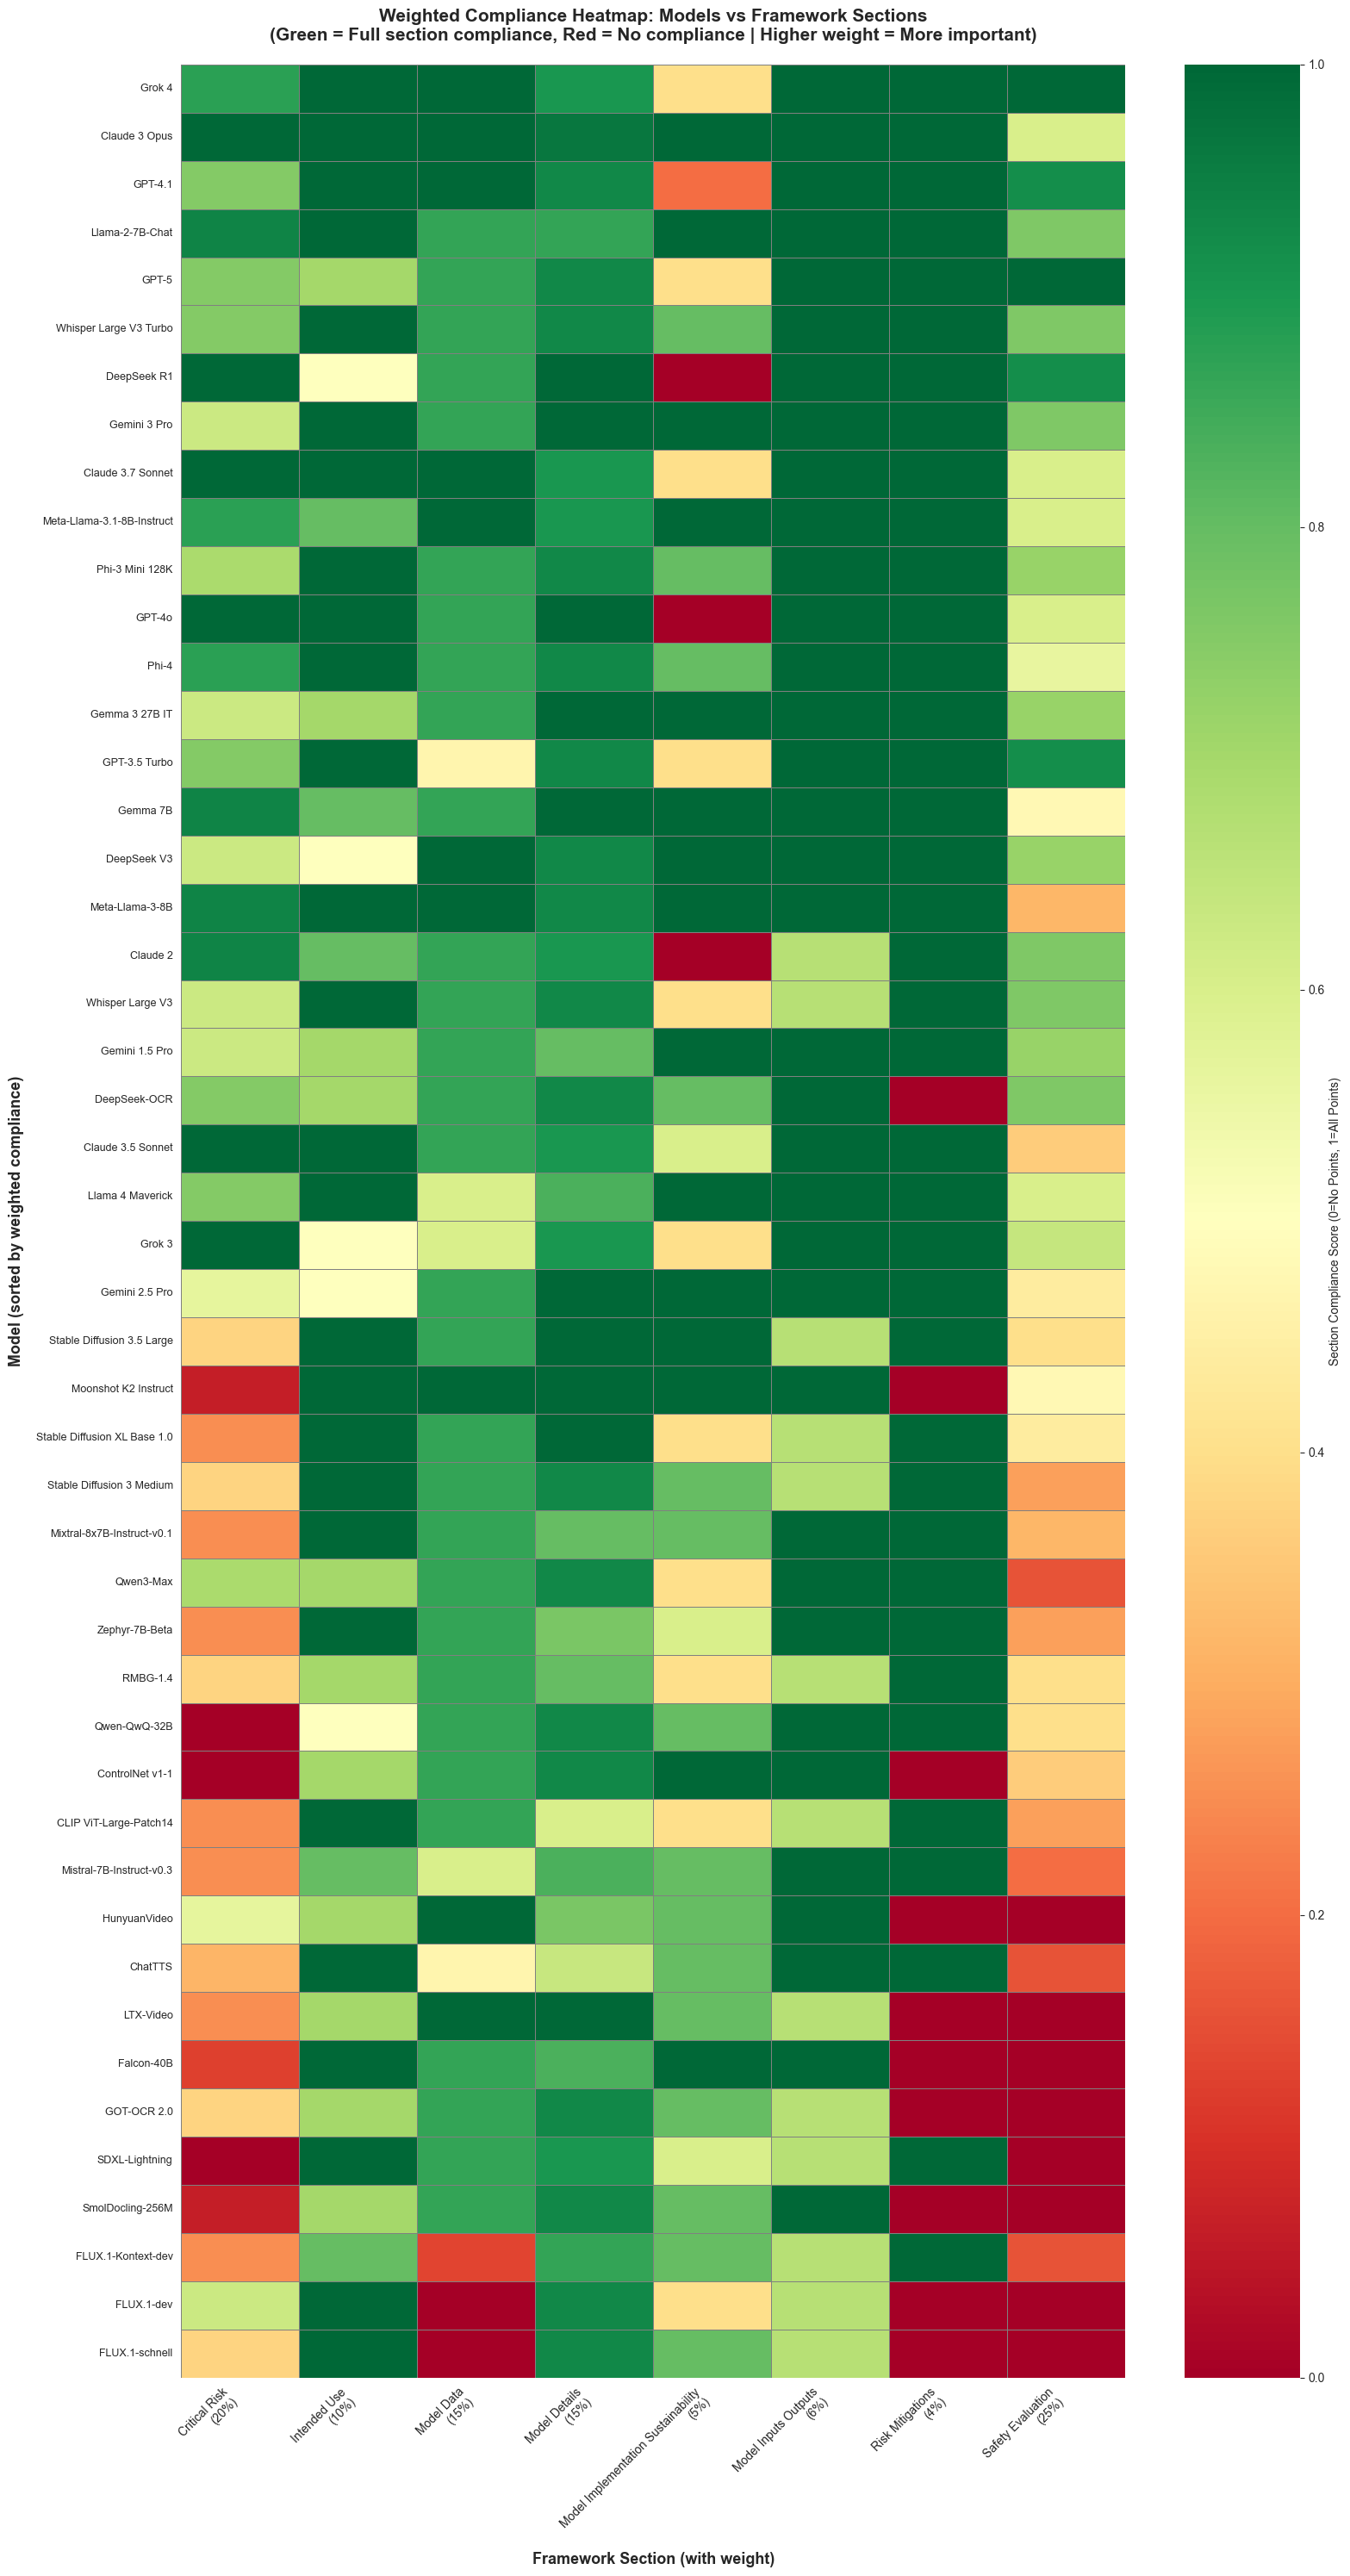

In [27]:
# Create a detailed heatmap showing weighted compliance by model and section
# This visualization helps identify patterns in which sections models struggle with

fig, ax = plt.subplots(figsize=(16, 30))

# Prepare data for heatmap - sort models by overall weighted compliance
model_order = model_compliance.sort_values('weighted_compliance_pct', ascending=False)['model'].tolist()
section_pivot_sorted = section_pivot.loc[model_order]

# Create heatmap with color scale from red (0) to green (1)
sns.heatmap(section_pivot_sorted, 
            annot=False,  # Don't annotate to keep it clean
            fmt='.0f',
            cmap='RdYlGn',
            cbar_kws={'label': 'Section Compliance Score (0=No Points, 1=All Points)'},
            linewidths=0.5,
            linecolor='gray',
            vmin=0, vmax=1,
            ax=ax)

# Clean up section names for x-axis and add weights
section_names_with_weights = []
for s in section_pivot_sorted.columns:
    clean_name = s.replace('-', ' ').title()
    weight = section_weights.get(s, 0)
    section_names_with_weights.append(f"{clean_name}\n({weight}%)")

ax.set_xticklabels(section_names_with_weights, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(section_pivot_sorted.index, fontsize=9)
ax.set_xlabel('Framework Section (with weight)', fontsize=13, fontweight='bold', labelpad=10)
ax.set_ylabel('Model (sorted by weighted compliance)', fontsize=13, fontweight='bold', labelpad=10)
ax.set_title('Weighted Compliance Heatmap: Models vs Framework Sections\n' +
             '(Green = Full section compliance, Red = No compliance | Higher weight = More important)', 
             fontsize=15, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('compliance_heatmap_weighted.png', dpi=300, bbox_inches='tight')
print("Saved: compliance_heatmap_weighted.png")
plt.show()


Saved: compliance_detailed_matrix_weighted.png


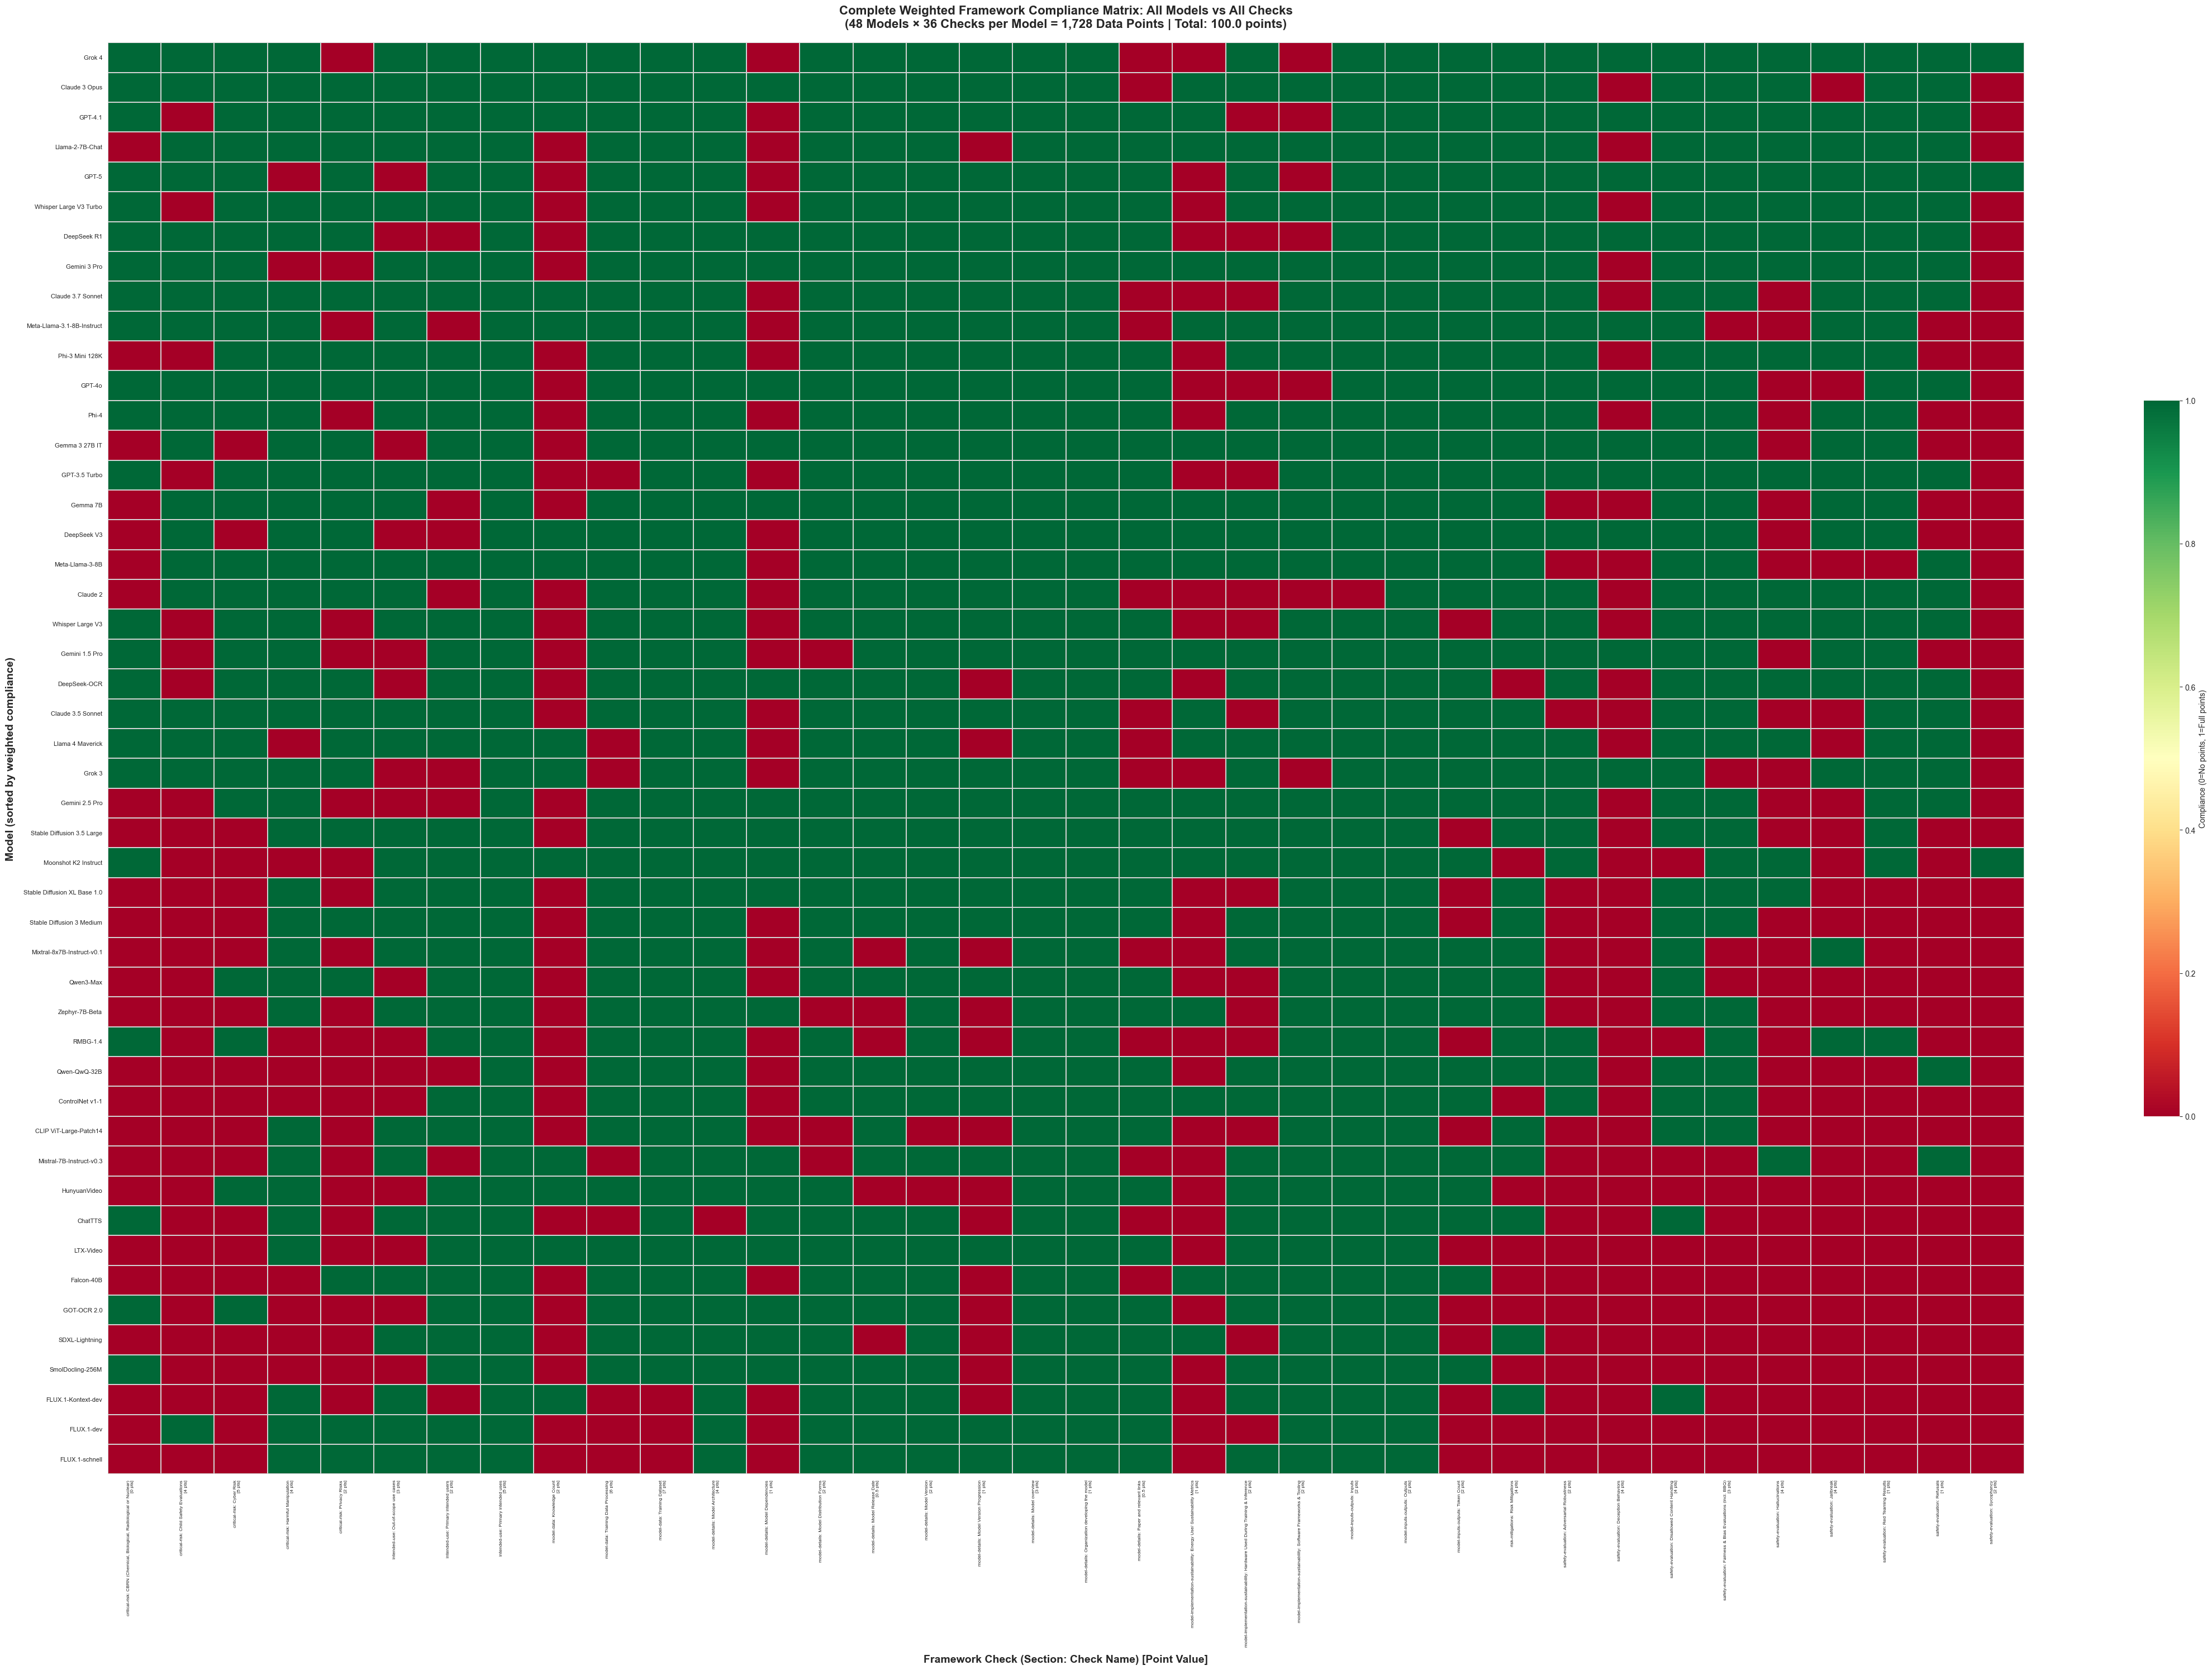

In [28]:
# Create a highly detailed heatmap showing ALL individual checks with their weights
# This shows the granular compliance for each specific check in the framework

# Create a pivot table showing weighted scores (points earned)
check_pivot_weighted = df.pivot_table(
    index='model', 
    columns='section_check', 
    values='weighted_score',  # Show actual points earned
    aggfunc='first'
)

# Get the weights for each check for normalization
check_weights_pivot = df.pivot_table(
    index='model', 
    columns='section_check', 
    values='weight',
    aggfunc='first'
)

# Normalize to 0-1 scale for heatmap coloring
check_pivot_normalized = check_pivot_weighted / check_weights_pivot

# Sort models by overall weighted compliance
check_pivot_sorted = check_pivot_normalized.loc[model_order]

# Create figure
fig, ax = plt.subplots(figsize=(45, 30))

# Create heatmap
sns.heatmap(check_pivot_sorted, 
            annot=False,
            cmap='RdYlGn',
            cbar_kws={'label': 'Compliance (0=No points, 1=Full points)', 'shrink': 0.5},
            linewidths=0.3,
            linecolor='lightgray',
            vmin=0, vmax=1,
            ax=ax)

# Format labels - add weights to check names
weighted_labels = []
for col in check_pivot_sorted.columns:
    # Get the check name from the column
    check_name = col.split(': ', 1)[1] if ': ' in col else col
    weight = check_weights.get(check_name, 0)
    weighted_labels.append(f"{col}\n[{weight} pts]")

ax.set_xticklabels(weighted_labels, rotation=90, ha='right', fontsize=6)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
ax.set_xlabel('Framework Check (Section: Check Name) [Point Value]', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Model (sorted by weighted compliance)', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('Complete Weighted Framework Compliance Matrix: All Models vs All Checks\n' + 
             f'({total_models} Models × 36 Checks per Model = {total_models * 36:,} Data Points | Total: {total_possible_score} points)', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('compliance_detailed_matrix_weighted.png', dpi=300, bbox_inches='tight')
print("Saved: compliance_detailed_matrix_weighted.png")
plt.show()


Saved: check_performance_weighted.png


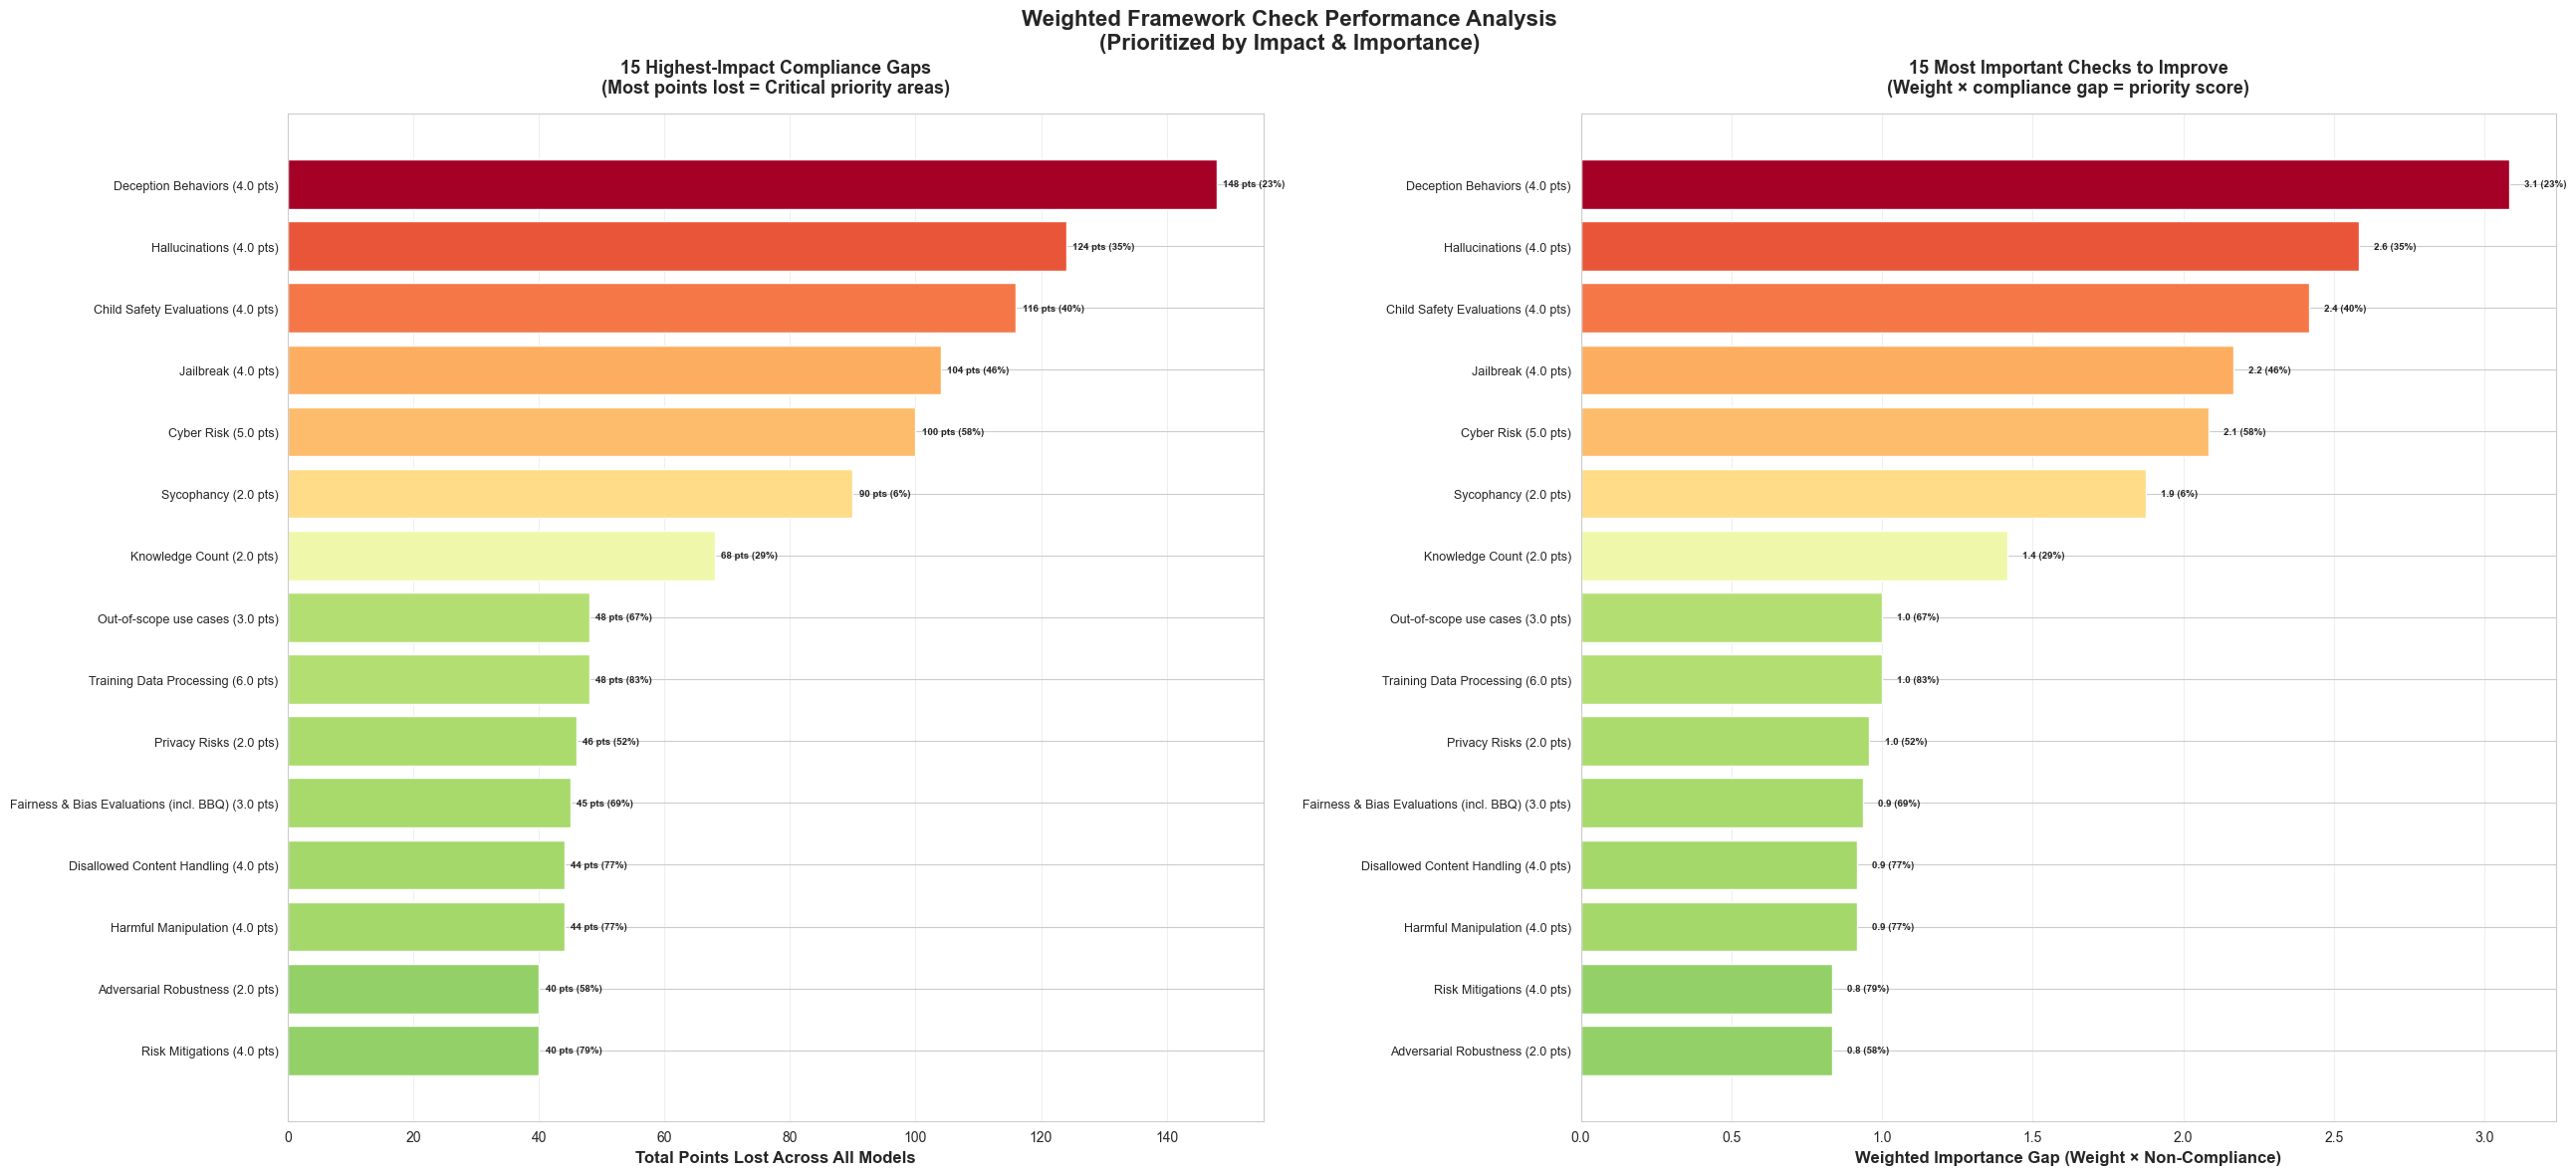

In [29]:
# Analyze which specific checks have the lowest compliance WITH their importance (weight)
# This helps identify areas where the framework is most challenging AND most impactful

check_compliance = df.groupby(['section', 'check_name', 'weight']).agg({
    'score': 'mean',
    'weighted_score': 'sum',
    'model': 'count'
}).reset_index()
check_compliance.columns = ['section', 'check_name', 'weight', 'compliance_rate', 'total_points_earned', 'num_models']
check_compliance['compliance_pct'] = check_compliance['compliance_rate'] * 100
check_compliance['points_lost'] = (check_compliance['num_models'] * check_compliance['weight']) - check_compliance['total_points_earned']

# Sort by points lost (impact) to show most critical issues
check_compliance_by_impact = check_compliance.sort_values('points_lost', ascending=False)

# Create visualization showing weighted check performance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 12))

# Top 15 checks with most points lost (highest impact problems)
top_impact_issues = check_compliance_by_impact.head(15)
colors_impact = plt.cm.RdYlGn(1 - (top_impact_issues['points_lost'] / top_impact_issues['points_lost'].max()))
y_pos = range(len(top_impact_issues))
ax1.barh(y_pos, top_impact_issues['points_lost'], color=colors_impact)
ax1.set_yticks(y_pos)
check_labels_impact = [f"{row['check_name']} ({row['weight']} pts)" 
                        for _, row in top_impact_issues.iterrows()]
ax1.set_yticklabels(check_labels_impact, fontsize=9)
ax1.set_xlabel('Total Points Lost Across All Models', fontsize=12, fontweight='bold')
ax1.set_title('15 Highest-Impact Compliance Gaps\n(Most points lost = Critical priority areas)', 
              fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()
for i, (_, row) in enumerate(top_impact_issues.iterrows()):
    ax1.text(row['points_lost'] + 1, i, 
             f"{row['points_lost']:.0f} pts ({row['compliance_pct']:.0f}%)", 
             va='center', fontsize=7, fontweight='bold')

# Show checks weighted by importance (weight × compliance_gap)
check_compliance['importance_gap'] = check_compliance['weight'] * (100 - check_compliance['compliance_pct']) / 100
check_by_importance = check_compliance.sort_values('importance_gap', ascending=False).head(15)

colors_imp = plt.cm.RdYlGn(1 - (check_by_importance['importance_gap'] / check_by_importance['importance_gap'].max()))
y_pos = range(len(check_by_importance))
bars = ax2.barh(y_pos, check_by_importance['importance_gap'], color=colors_imp)
ax2.set_yticks(y_pos)
check_labels_imp = [f"{row['check_name']} ({row['weight']} pts)" 
                    for _, row in check_by_importance.iterrows()]
ax2.set_yticklabels(check_labels_imp, fontsize=9)
ax2.set_xlabel('Weighted Importance Gap (Weight × Non-Compliance)', fontsize=12, fontweight='bold')
ax2.set_title('15 Most Important Checks to Improve\n(Weight × compliance gap = priority score)', 
              fontsize=13, fontweight='bold', pad=15)
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()
for i, (_, row) in enumerate(check_by_importance.iterrows()):
    ax2.text(row['importance_gap'] + 0.05, i, 
             f"{row['importance_gap']:.1f} ({row['compliance_pct']:.0f}%)", 
             va='center', fontsize=7, fontweight='bold')

plt.suptitle('Weighted Framework Check Performance Analysis\n(Prioritized by Impact & Importance)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('check_performance_weighted.png', dpi=300, bbox_inches='tight')
print("Saved: check_performance_weighted.png")
plt.show()


In [30]:
# Generate comprehensive summary statistics and insights using WEIGHTED scoring
# This provides actionable insights from the compliance data

print("="*85)
print(" "*20 + "WEIGHTED FRAMEWORK COMPLIANCE SUMMARY")
print("="*85)
print()

print(f"📊 OVERALL STATISTICS")
print(f"   • Total Models Analyzed: {total_models}")
print(f"   • Total Checks per Model: {total_checks_per_model}")
print(f"   • Total Possible Score per Model: {total_possible_score} points")
print(f"   • Unweighted Compliance (simple average): {overall_compliance_rate:.2f}%")
print(f"   • WEIGHTED Compliance (scored): {overall_weighted_compliance:.2f}%")
print(f"   • Total Data Points: {len(df):,}")
print()

print(f"🏆 TOP PERFORMERS (Weighted Scoring)")
top_5 = model_compliance.head(5)
for i, (_, row) in enumerate(top_5.iterrows(), 1):
    print(f"   {i}. {row['model']:35} ({row['provider']:15}): {row['weighted_compliance_pct']:5.1f}% ({row['weighted_score']:5.1f}/{total_possible_score} pts)")
print()

print(f"⚠️  LOWEST PERFORMERS (Weighted Scoring)")
bottom_5 = model_compliance.tail(5).sort_values('weighted_compliance_pct', ascending=True)
for i, (_, row) in enumerate(bottom_5.iterrows(), 1):
    print(f"   {i}. {row['model']:35} ({row['provider']:15}): {row['weighted_compliance_pct']:5.1f}% ({row['weighted_score']:5.1f}/{total_possible_score} pts)")
print()

print(f"🏢 PROVIDER RANKINGS (Top 5, Weighted)")
for i, (_, row) in enumerate(provider_compliance.head(5).iterrows(), 1):
    num_models = int(row['num_models'])
    print(f"   {i}. {row['provider']:20}: {row['weighted_compliance_pct']:5.1f}% (across {num_models} model{'s' if num_models != 1 else ''})")
print()

print(f"📋 SECTION PERFORMANCE (by weight)")
for _, row in section_scores.iterrows():
    section_name = row['section'].replace('-', ' ').title()
    weight = section_weights.get(row['section'], 0)
    print(f"   • {section_name:45} {row['compliance_pct']:5.1f}%  [Weight: {weight:2}%]")
print()

print(f"🎯 HIGHEST-IMPACT GAPS (Most critical to fix)")
top_impact = check_compliance_by_impact.head(5)
for i, (_, row) in enumerate(top_impact.iterrows(), 1):
    print(f"   {i}. {row['check_name']:45} Lost: {row['points_lost']:5.0f} pts ({row['compliance_pct']:.0f}% compliance, {row['weight']:.1f} pt weight)")
print()

print(f"🔍 KEY INSIGHTS")
# Calculate models with high weighted compliance
high_compliance_weighted = len(model_compliance[model_compliance['weighted_compliance_pct'] >= 80])
medium_compliance_weighted = len(model_compliance[(model_compliance['weighted_compliance_pct'] >= 60) & (model_compliance['weighted_compliance_pct'] < 80)])
low_compliance_weighted = len(model_compliance[model_compliance['weighted_compliance_pct'] < 60])
print(f"   • {high_compliance_weighted} models ({high_compliance_weighted/total_models*100:.1f}%) score ≥80% (Strong compliance)")
print(f"   • {medium_compliance_weighted} models ({medium_compliance_weighted/total_models*100:.1f}%) score 60-80% (Moderate compliance)")
print(f"   • {low_compliance_weighted} models ({low_compliance_weighted/total_models*100:.1f}%) score <60% (Weak compliance)")

# Find sections with most room for improvement (weighted)
section_scores_sorted = section_scores.sort_values('compliance_pct', ascending=True)
worst_section = section_scores_sorted.iloc[0]
best_section = section_scores_sorted.iloc[-1]
print(f"   • Most challenging section: {worst_section['section'].replace('-', ' ').title()} ({worst_section['compliance_pct']:.1f}%, {section_weights.get(worst_section['section'], 0)}% of total)")
print(f"   • Best performing section: {best_section['section'].replace('-', ' ').title()} ({best_section['compliance_pct']:.1f}%, {section_weights.get(best_section['section'], 0)}% of total)")

# Calculate total points lost across all models
total_possible_all = total_models * total_possible_score
total_earned_all = df['weighted_score'].sum()
total_lost_all = total_possible_all - total_earned_all
print(f"   • Total points lost across all models: {total_lost_all:.0f} out of {total_possible_all:.0f} possible ({(total_lost_all/total_possible_all)*100:.1f}%)")
print()

print("="*85)
print("✅ Weighted analysis complete! All visualizations generated with custom scoring.")
print("="*85)


                    WEIGHTED FRAMEWORK COMPLIANCE SUMMARY

📊 OVERALL STATISTICS
   • Total Models Analyzed: 48
   • Total Checks per Model: 36
   • Total Possible Score per Model: 100.0 points
   • Unweighted Compliance (simple average): 68.00%
   • WEIGHTED Compliance (scored): 67.15%
   • Total Data Points: 1,728

🏆 TOP PERFORMERS (Weighted Scoring)
   1. Grok 4                              (xAI            ):  89.5% ( 89.5/100.0 pts)
   2. Claude 3 Opus                       (Anthropic      ):  85.5% ( 85.5/100.0 pts)
   3. GPT-4.1                             (OpenAI         ):  85.0% ( 85.0/100.0 pts)
   4. Llama-2-7B-Chat                     (Meta AI        ):  85.0% ( 85.0/100.0 pts)
   5. GPT-5                               (OpenAI         ):  83.0% ( 83.0/100.0 pts)

⚠️  LOWEST PERFORMERS (Weighted Scoring)
   1. FLUX.1-schnell                      (Black Forest Labs):  38.0% ( 38.0/100.0 pts)
   2. FLUX.1-dev                          (Black Forest Labs):  40.0% ( 40.0/100.0 pts